In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 📥 Load the dataset
df = pd.read_csv("vocal_gender_features_new.csv")

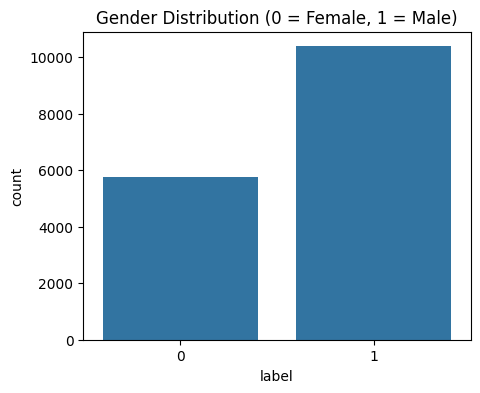

<Figure size 640x480 with 0 Axes>

In [3]:
# EDA (Exploratory Data Analysis) 
# 1. Gender distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=df)
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.show()
plt.savefig("Distribution")

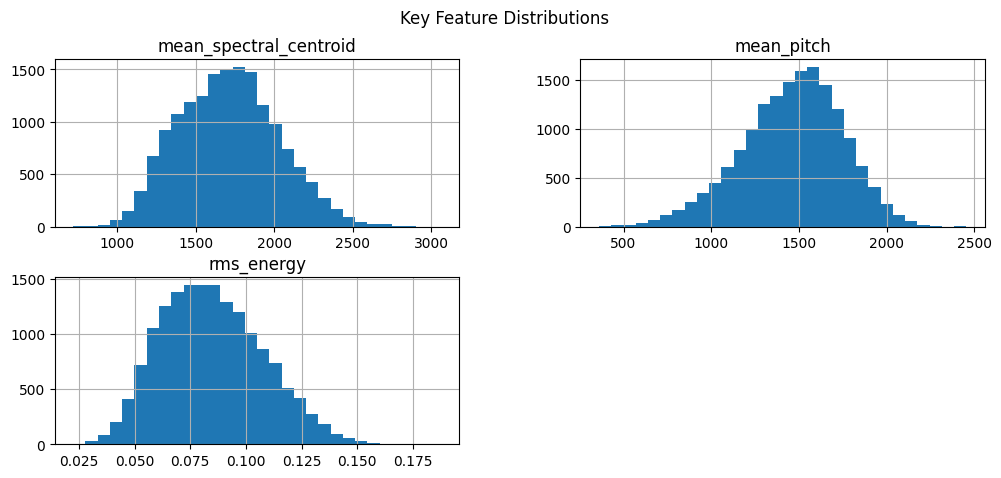

<Figure size 640x480 with 0 Axes>

In [4]:
# 2. Histograms for selected features
features = ['mean_spectral_centroid', 'mean_pitch', 'rms_energy']
df[features].hist(bins=30, figsize=(12, 5))
plt.suptitle("Key Feature Distributions")
plt.show()
plt.savefig("feature_distributions.png")

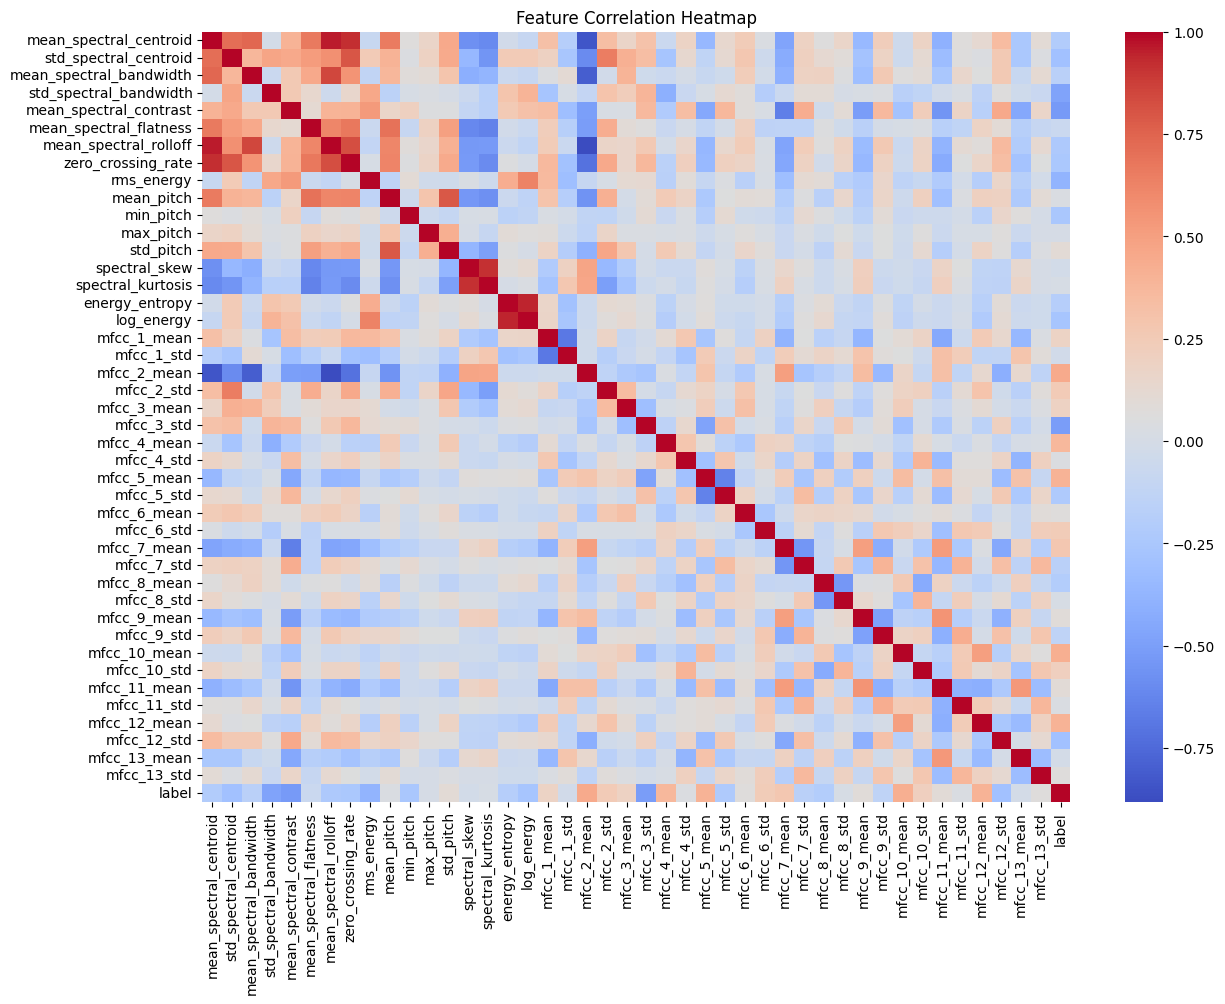

<Figure size 640x480 with 0 Axes>

In [5]:
# 3. Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig("dbscan_clusters.png")

In [6]:
# Preprocessing ------------
# Feature and label separation
X = df.drop(columns=["label"])
y = df["label"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# Shape check
print("✅ Preprocessing Complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Preprocessing Complete!
X_train shape: (12918, 43)
X_test shape: (3230, 43)
y_train shape: (12918,)
y_test shape: (3230,)


In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Use smaller sample for silhouette score
X_sample = X_scaled[:3000]

# --- KMeans ---
sil_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    sil_scores.append(silhouette_score(X_sample, labels))

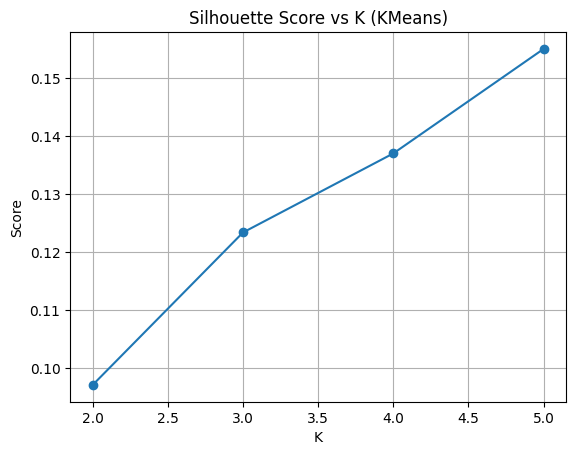

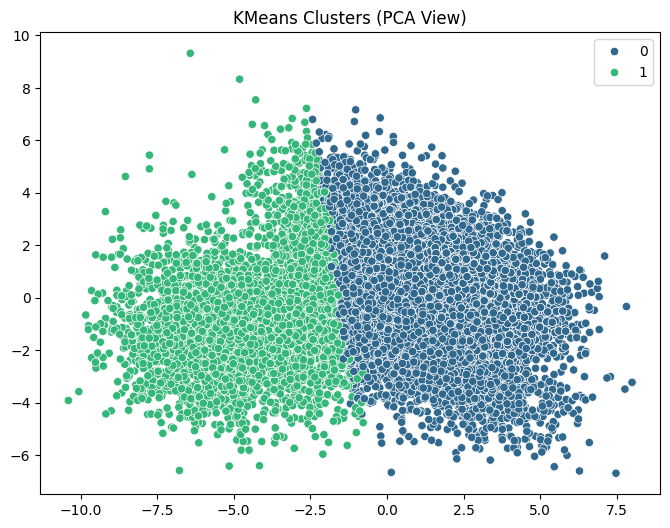

In [10]:
# Plot silhouette scores
plt.plot(range(2, 6), sil_scores, marker='o')
plt.title("Silhouette Score vs K (KMeans)")
plt.xlabel("K")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Final KMeans on full data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clusters (PCA View)")
plt.show()

In [11]:
# --- DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

unique_labels = set(dbscan_labels) - {-1}
if len(unique_labels) > 1:
    core_mask = dbscan_labels != -1
    sil_score = silhouette_score(X_scaled[core_mask], dbscan_labels[core_mask])
    print(f"DBSCAN Silhouette Score: {sil_score:.2f}")
else:
    print(f"DBSCAN found only noise or one cluster. Labels: {unique_labels}")

DBSCAN found only noise or one cluster. Labels: {np.int64(0)}


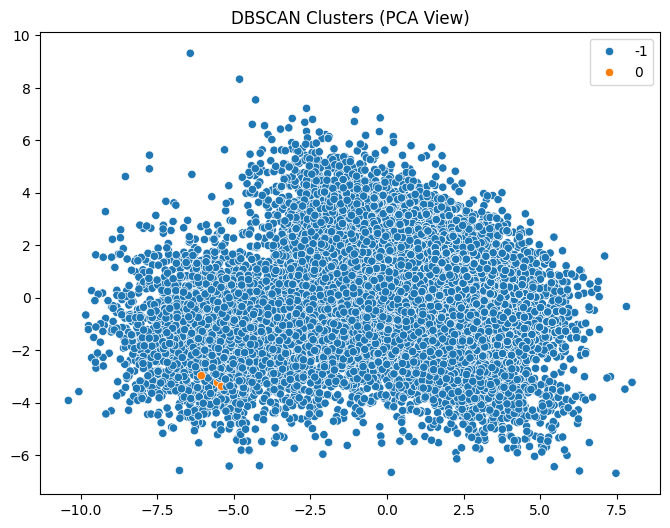

In [12]:
# Visualize DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("DBSCAN Clusters (PCA View)")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# ✅ Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1154
           1       0.99      1.00      1.00      2076

    accuracy                           1.00      3230
   macro avg       1.00      0.99      0.99      3230
weighted avg       1.00      1.00      1.00      3230



In [15]:
# ✅ Support Vector Machine Classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n📊 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


📊 SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1154
           1       1.00      1.00      1.00      2076

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



In [16]:
# ✅ Neural Network Classifier (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("\n📊 MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))


📊 MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1154
           1       1.00      1.00      1.00      2076

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



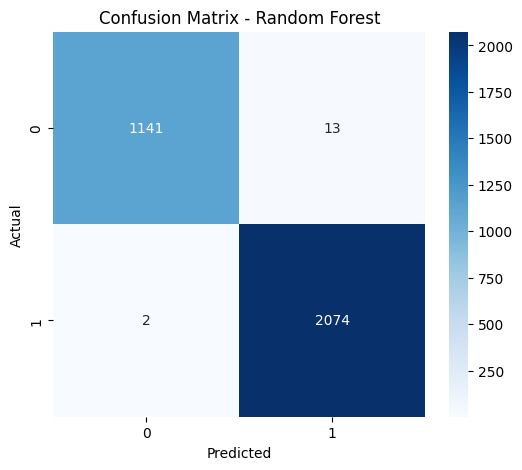

In [17]:
# ✅ Confusion Matrix for Random Forest (Best Model Example)
conf_mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
import joblib  


In [19]:
rf = RandomForestClassifier()
rf.fit(X_scaled, y)

RandomForestClassifier()

In [20]:
best_model = rf
# Save scaler
joblib.dump(scaler, "scaler.pkl")
# Save model
joblib.dump(best_model, "voice_classifier_model.pkl")

print("✅ Scaler and model saved successfully!")

✅ Scaler and model saved successfully!


In [21]:
# Load saved model and scaler
loaded_scaler = joblib.load("scaler.pkl")
loaded_model = joblib.load("voice_classifier_model.pkl")

# Predict on a sample input
sample = X.iloc[0:1]  # One row
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print("Predicted label:", prediction[0])  # 0 = Female, 1 = Male


Predicted label: 0


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv("vocal_gender_features_new.csv")

# Select only 10 important features
selected_features = [
    'mean_pitch', 'rms_energy', 'mfcc_1_mean', 'mfcc_2_mean',
    'mfcc_3_mean', 'mean_spectral_centroid', 'mean_spectral_bandwidth',
    'spectral_kurtosis', 'log_energy', 'zero_crossing_rate'
]

X = df[selected_features]
y = df['label']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler_10 = StandardScaler()
X_train_scaled = scaler_10.fit_transform(X_train)
X_test_scaled = scaler_10.transform(X_test)

# Train Random Forest
model_10 = RandomForestClassifier(random_state=42)
model_10.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model_10, "model_10features.pkl")
joblib.dump(scaler_10, "scaler_10.pkl")

print("✅ 10-feature model and scaler saved successfully!")


✅ 10-feature model and scaler saved successfully!
